In [1]:
import sys
import os, os.path

sys.path.append(os.path.join(os.getcwd() ,'/modules'))
root_path = "C:/git/Springboard-Public/Capstone Project 2/"
IN_COLAB = 'google.colab' in sys.modules
if IN_COLAB:
    from google.colab import drive
    drive.mount('/content/drive')
    root_path = "/content/drive/My Drive/Capstone Project 2/"

print('Current Working Dir: ', os.getcwd())
print('Root Path: ', root_path)

# We need to set the working directory since we are using relative paths from various locations
if os.getcwd() != root_path:
  os.chdir(root_path)

In [2]:
from modules.lib.StandardTraining import *
from modules.models.ResNet import ResNet_GrayScale_12_Out

from torchsummary import summary

# os.environ['CUDA_LAUNCH_BLOCKING'] = "1"

%matplotlib inline

In [3]:
force_cpu = True
device = torch.device('cuda' if ~force_cpu and torch.cuda.is_available() else 'cpu')
# Assume that we are on a CUDA machine, then this should print a CUDA device:
print(f'Working on device={device}')

Working on device=cuda


In [4]:
net = ResNet_GrayScale_12_Out(layers=18) #18, 34, 50, 101, 152

net = nn.DataParallel(net)
net.to(device)


summary(net, (1, 320, 320))   

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1         [-1, 64, 160, 160]           3,136
       BatchNorm2d-2         [-1, 64, 160, 160]             128
              ReLU-3         [-1, 64, 160, 160]               0
         MaxPool2d-4           [-1, 64, 80, 80]               0
            Conv2d-5           [-1, 64, 80, 80]          36,864
       BatchNorm2d-6           [-1, 64, 80, 80]             128
              ReLU-7           [-1, 64, 80, 80]               0
            Conv2d-8           [-1, 64, 80, 80]          36,864
       BatchNorm2d-9           [-1, 64, 80, 80]             128
             ReLU-10           [-1, 64, 80, 80]               0
       BasicBlock-11           [-1, 64, 80, 80]               0
           Conv2d-12           [-1, 64, 80, 80]          36,864
      BatchNorm2d-13           [-1, 64, 80, 80]             128
             ReLU-14           [-1, 64,

In [5]:
standardTraining = StandardTraining(number_images=500, 
                                     batch_size=1, 
                                     learning_rate=1e-3, 
                                     num_epochs=4,
                                     device=device, 
                                     net=net)

C:\git\Springboard-Public\Capstone Project 2\modules\lib\ChextXRayImages.py:251: UserWarning: 
Feature Imbalance Detected (train % - val %):
   Cardiomegaly: 4.42%
   Lung_Lesion: 3.85%

  self.warnFeatureImbalance(train, value)


Number of Training Images: 392
Number of Validation Images: 108


In [6]:
standardTraining.train()

Epoch [1/4]
Epoch Loss: 145.3340         
Training Time: 0:00:34.983482)          
Validation Time: 0:00:02.673852)

TRAINING



C:\Users\youci\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


,Target,True Positive Count,Recall,Precision,F1,ROC AUC,Avg Precision
1,Cardiomegaly,50,0.000000,0.000000,0.000000,0.499649,0.129453
4,Edema,84,0.035714,0.176471,0.059406,0.450912,0.201411
5,Consolidation,15,0.000000,0.000000,0.000000,0.432538,0.035291
7,Atelectasis,62,0.000000,0.000000,0.000000,0.562170,0.193615
9,Pleural_Effusion,130,0.153846,0.400000,0.222222,0.504815,0.375705



VALIDATION



C:\Users\youci\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


,Target,True Positive Count,Recall,Precision,F1,ROC AUC,Avg Precision
1,Cardiomegaly,9,0.0,0.0,0.0,0.552189,0.140409
4,Edema,31,0.0,0.0,0.0,0.511940,0.328203
5,Consolidation,8,0.0,0.0,0.0,0.347500,0.073730
7,Atelectasis,15,0.0,0.0,0.0,0.463799,0.147398
9,Pleural_Effusion,37,0.0,0.0,0.0,0.497145,0.334431


Epoch [2/4]
Epoch Loss: 136.2739         
Training Time: 0:00:35.015398)          
Validation Time: 0:00:02.653905)

TRAINING



C:\Users\youci\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


,Target,True Positive Count,Recall,Precision,F1,ROC AUC,Avg Precision
1,Cardiomegaly,50,0.000000,0.000000,0.000000,0.495380,0.129153
4,Edema,84,0.000000,0.000000,0.000000,0.471475,0.214908
5,Consolidation,15,0.000000,0.000000,0.000000,0.503802,0.038942
7,Atelectasis,62,0.000000,0.000000,0.000000,0.490371,0.179877
9,Pleural_Effusion,130,0.107692,0.482759,0.176101,0.496359,0.369407



VALIDATION



C:\Users\youci\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


,Target,True Positive Count,Recall,Precision,F1,ROC AUC,Avg Precision
1,Cardiomegaly,9,0.0,0.0,0.0,0.539843,0.118980
4,Edema,31,0.0,0.0,0.0,0.478844,0.273994
5,Consolidation,8,0.0,0.0,0.0,0.485000,0.084963
7,Atelectasis,15,0.0,0.0,0.0,0.559857,0.234350
9,Pleural_Effusion,37,0.0,0.0,0.0,0.602589,0.458828


Epoch [3/4]
Epoch Loss: 132.7279         
Training Time: 0:00:35.436272)          
Validation Time: 0:00:02.361686)

TRAINING



C:\Users\youci\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


,Target,True Positive Count,Recall,Precision,F1,ROC AUC,Avg Precision
1,Cardiomegaly,50,0.000000,0.000000,0.000000,0.549825,0.173696
4,Edema,84,0.000000,0.000000,0.000000,0.486665,0.224525
5,Consolidation,15,0.000000,0.000000,0.000000,0.504332,0.039579
7,Atelectasis,62,0.000000,0.000000,0.000000,0.467937,0.146044
9,Pleural_Effusion,130,0.069231,0.409091,0.118421,0.504903,0.341413



VALIDATION



C:\Users\youci\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


,Target,True Positive Count,Recall,Precision,F1,ROC AUC,Avg Precision
1,Cardiomegaly,9,0.0,0.0,0.0,0.549944,0.103589
4,Edema,31,0.0,0.0,0.0,0.603687,0.390740
5,Consolidation,8,0.0,0.0,0.0,0.488750,0.087292
7,Atelectasis,15,0.0,0.0,0.0,0.458781,0.133276
9,Pleural_Effusion,37,0.0,0.0,0.0,0.561858,0.376660


Epoch [4/4]
Epoch Loss: 133.0521         
Training Time: 0:00:16.602646)          
Validation Time: 0:00:01.125000)

TRAINING



C:\Users\youci\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


,Target,True Positive Count,Recall,Precision,F1,ROC AUC,Avg Precision
1,Cardiomegaly,50,0.0,0.0,0.0,0.460058,0.119436
4,Edema,84,0.0,0.0,0.0,0.517200,0.222877
5,Consolidation,15,0.0,0.0,0.0,0.571530,0.047527
7,Atelectasis,62,0.0,0.0,0.0,0.552835,0.173952
9,Pleural_Effusion,130,0.0,0.0,0.0,0.533441,0.380618



VALIDATION



C:\Users\youci\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


,Target,True Positive Count,Recall,Precision,F1,ROC AUC,Avg Precision
1,Cardiomegaly,9,0.0,0.0,0.0,0.539843,0.123423
4,Edema,31,0.0,0.0,0.0,0.488060,0.276661
5,Consolidation,8,0.0,0.0,0.0,0.515000,0.095610
7,Atelectasis,15,0.0,0.0,0.0,0.563441,0.263536
9,Pleural_Effusion,37,0.0,0.0,0.0,0.604492,0.459522



TRAINING



,Score for all Targets
Accuracy Score,0.168367
Hamming Loss,0.136692
Combined Recall,0.129209
Combined Precision,0.247449
Combined F1,0.160289


C:\Users\youci\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


,Target,True Positive Count,Recall,Precision,F1,ROC AUC,Avg Precision
0,Enlarged_Cardiomediastinum,22,0.000000,0.000000,0.000000,0.451474,0.056400
1,Cardiomegaly,50,0.000000,0.000000,0.000000,0.460058,0.119436
2,Lung_Opacity,183,0.530055,0.480198,0.503896,0.534865,0.497524
3,Lung_Lesion,26,0.000000,0.000000,0.000000,0.431169,0.058410
4,Edema,84,0.000000,0.000000,0.000000,0.517200,0.222877
5,Consolidation,15,0.000000,0.000000,0.000000,0.571530,0.047527
6,Pneumonia,6,0.000000,0.000000,0.000000,0.335060,0.013814
7,Atelectasis,62,0.000000,0.000000,0.000000,0.552835,0.173952
8,Pneumothorax,38,0.000000,0.000000,0.000000,0.447591,0.093556
9,Pleural_Effusion,130,0.000000,0.000000,0.000000,0.533441,0.380618


***** ROC *****


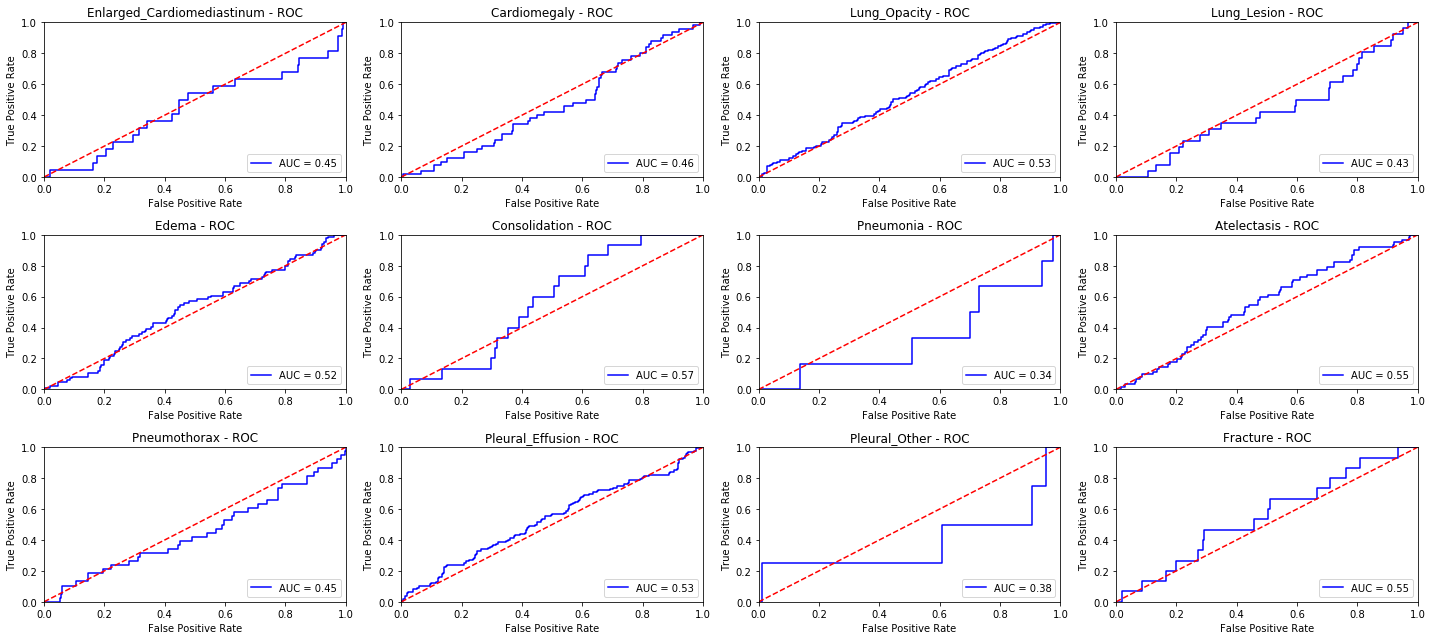

***** Precision / Recall *****


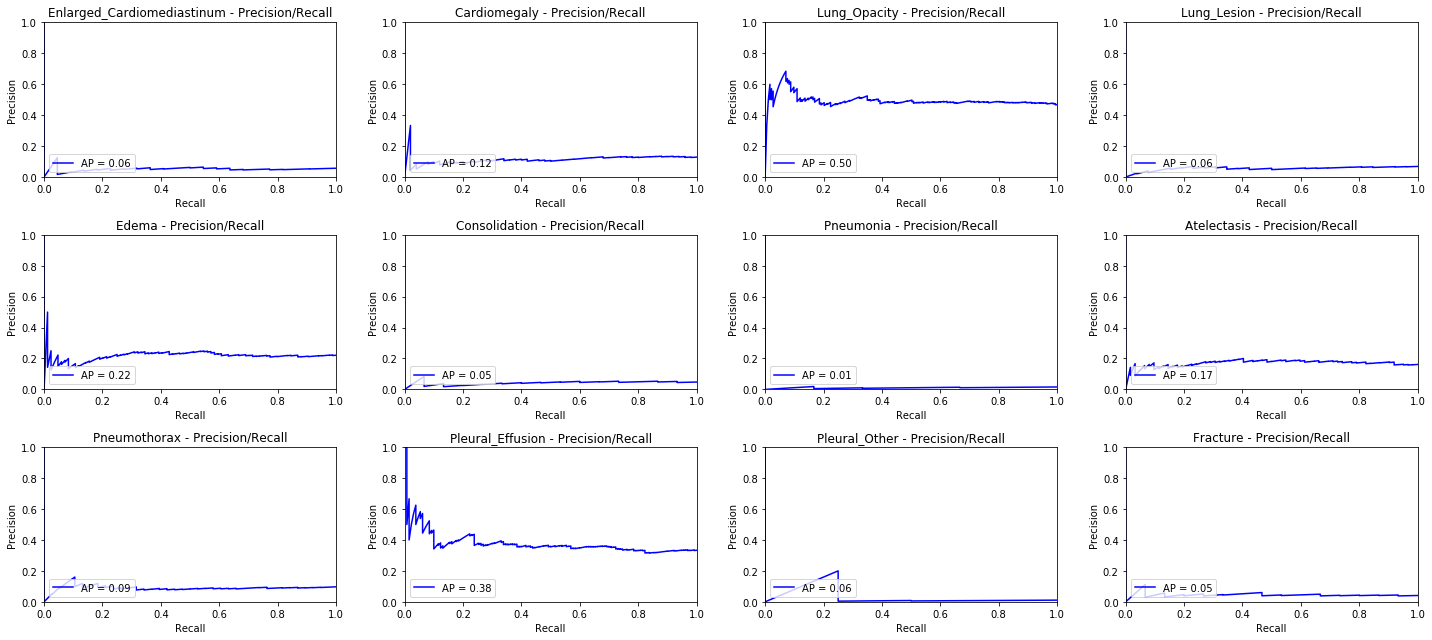


VALIDATION



,Score for all Targets
Accuracy Score,0.175926
Hamming Loss,0.136574
Combined Recall,0.000000
Combined Precision,0.000000
Combined F1,0.000000


C:\Users\youci\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


,Target,True Positive Count,Recall,Precision,F1,ROC AUC,Avg Precision
0,Enlarged_Cardiomediastinum,5,0.0,0.0,0.0,0.355340,0.041786
1,Cardiomegaly,9,0.0,0.0,0.0,0.539843,0.123423
2,Lung_Opacity,49,0.0,0.0,0.0,0.505016,0.463364
3,Lung_Lesion,3,0.0,0.0,0.0,0.660317,0.103053
4,Edema,31,0.0,0.0,0.0,0.488060,0.276661
5,Consolidation,8,0.0,0.0,0.0,0.515000,0.095610
6,Pneumonia,4,0.0,0.0,0.0,0.358173,0.036842
7,Atelectasis,15,0.0,0.0,0.0,0.563441,0.263536
8,Pneumothorax,10,0.0,0.0,0.0,0.444898,0.148287
9,Pleural_Effusion,37,0.0,0.0,0.0,0.604492,0.459522


***** ROC *****


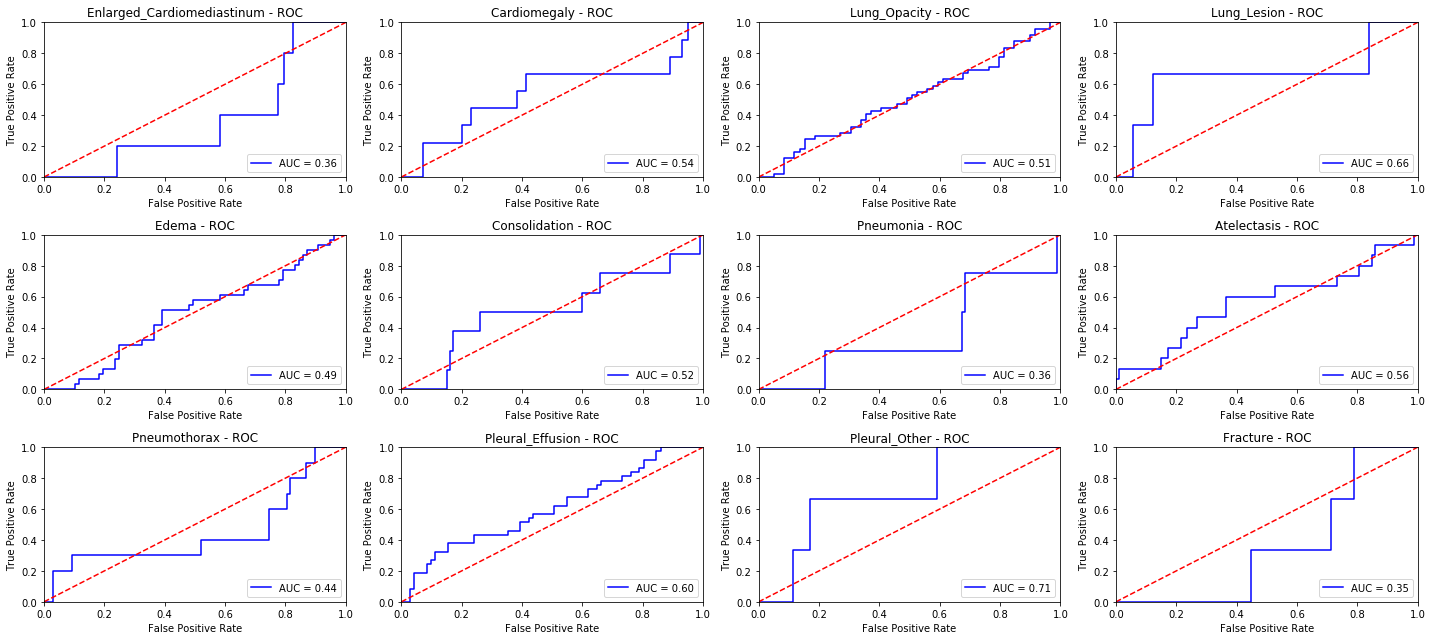

***** Precision / Recall *****


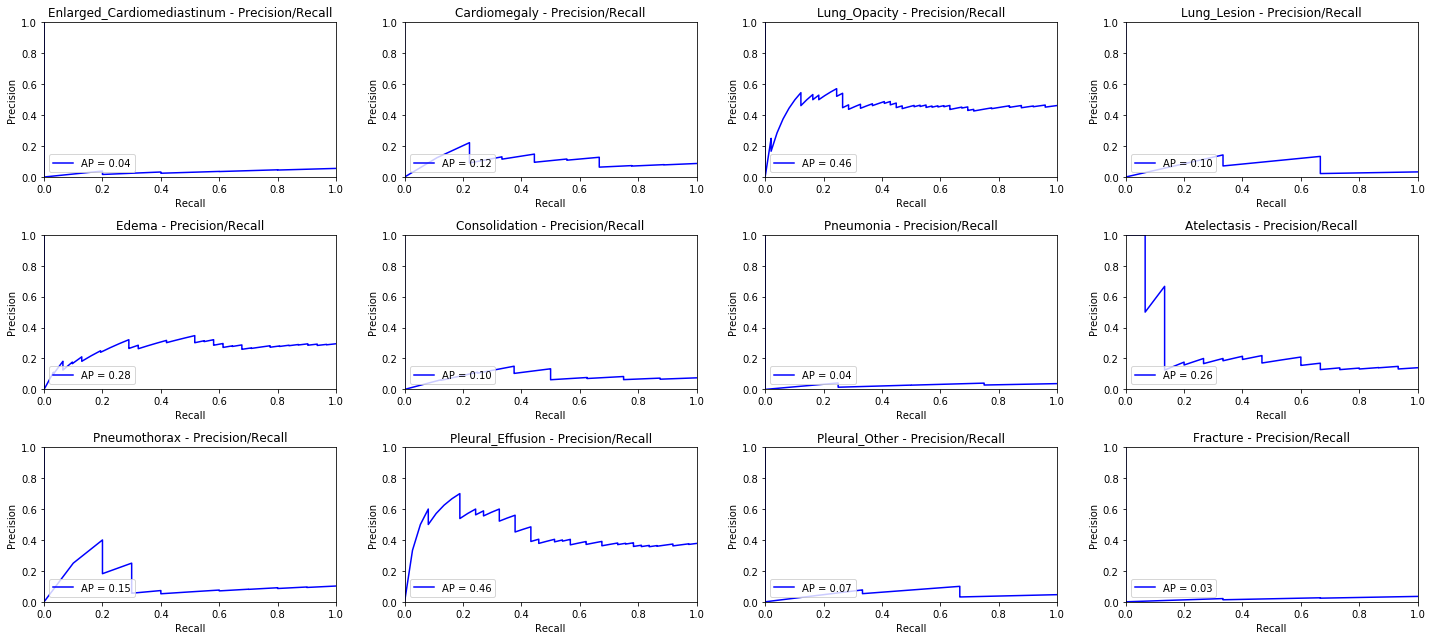

In [7]:
standardTraining.displayMetrics()